In [1]:
import sys
sys.path.append("../../XLEMOO")

In [2]:
from XLEMOO.LEMOO import EAParams, MLParams, LEMParams, LEMOO
from XLEMOO.fitness_indicators import naive_sum, must_sum_to_one
from XLEMOO.tree_interpreter import instantiate_tree_rules, find_all_paths
from desdeo_emo.recombination import SBX_xover, BP_mutation
from desdeo_emo.selection import TournamentSelection
from desdeo_problem.testproblems import test_problem_builder
from desdeo_tools.scalarization.ASF import SimpleASF

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
import numpy as np

## Define problem

In [10]:
n_objectives = 3
n_variables = 2
problem = test_problem_builder("DTLZ2", n_objectives, n_variables)

## Setting model parameters

In [11]:
asf = SimpleASF(np.ones(n_objectives))
ref_point = np.zeros(n_objectives)
# fitness_fun = lambda x: np.atleast_2d(asf(x.problem.evaluate(x.individuals).objectives, ref_point)).T
fitness_fun = naive_sum

lem_params = LEMParams(
    n_total_iterations=1,
    n_ea_gen_per_iter=25,
    n_ml_gen_per_iter=1,
    use_ea=False,
    use_ml=True,
    fitness_indicator=fitness_fun
)

ea_params = EAParams(
    population_size=50,
    cross_over_op=SBX_xover(),
    mutation_op=BP_mutation(problem.get_variable_lower_bounds(), problem.get_variable_upper_bounds()),
    selection_op=TournamentSelection(None, tournament_size=2),
    population_init_design="RandomDesign"
)

ml = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
ml_params = MLParams(
    H_split=0.3,
    L_split=0.3,
    ml_model=ml,
    ml_fitness=fitness_fun
)

## Setup LEMOO model

In [12]:
lemoo = LEMOO(problem, lem_params, ea_params, ml_params)

In [13]:
lemoo.reset_population()
history = lemoo.run()

starting learning mode


In [14]:
def plot_mean_fitness(population, fitness_fun):
    fitness = np.squeeze([naive_sum(p) for p in population])
    means = np.mean(fitness, axis=1)
    plt.plot(np.arange(means.shape[0]), means)

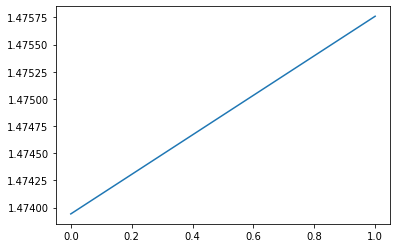

In [15]:
plot_mean_fitness(history, naive_sum)

{'rules': [[0, 'lte', 0.7097921669483185], [0, 'lte', 0.2519140988588333]], 'samples': 6.0, 'impurity': 0.0, 'classification': 1}
{'rules': [[0, 'lte', 0.7097921669483185], [0, 'gt', 0.2519140988588333]], 'samples': 15.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[0, 'gt', 0.7097921669483185]], 'samples': 9.0, 'impurity': 0.0, 'classification': 1}


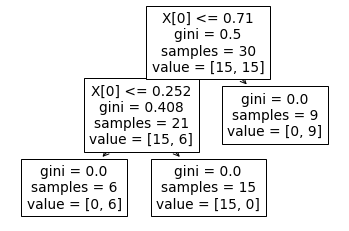

In [16]:
tree.plot_tree(lemoo.current_ml_model);
paths = find_all_paths(lemoo.current_ml_model)
for p in paths:
    print(p)